In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append('../../code/')
sys.path.append('/Users/ssulheim/git/mwf_gems/code/python')
import leakage_reframed
import ng_utils
import leakage
import reframed
import scipy

# C glutamicum

In [2]:
exometabolites_folder = Path("../../data/c_glutamicum/")
organism = 'c_glutamicum'
fn_OD = exometabolites_folder / "{0}_OD.csv".format(organism)

In [3]:
gDW_per_OD = 0.32

In [4]:
concentrations, concentrations_std = leakage.get_concentrations(exometabolites_folder, 'c_glutamicum')

In [5]:
df_OD = pd.read_csv(fn_OD, index_col=0)
df_OD.fillna(df_OD['OD std'].mean())

,OD mean,OD std
Time,,
0,0.291000,3.657989
11,2.460000,0.040000
12,3.366667,0.070946
13,4.123333,0.075719
14,5.316667,0.049329
15,8.813333,0.147422
16,14.000000,0.200000
17,15.866667,0.208167
18,19.533333,0.503322


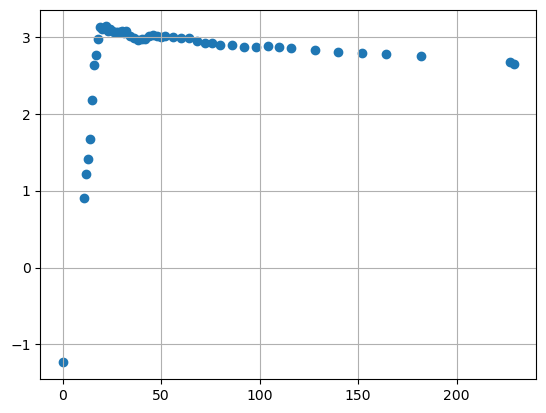

In [6]:
plt.scatter(df_OD.index, np.log(df_OD['OD mean']))
plt.grid()

In [20]:
xt = np.zeros(len(df_OD)-1)
for i in range(0, len(df_OD)-1):
    xt[i] = scipy.integrate.simpson(df_OD.loc[:, 'OD mean'].values[:i+1], x = df_OD.index[:i+1])
    # xt[i] = np.trapz(df_OD.loc[:i, 'OD mean'], dx=1)
    print(i,df_OD.index[i], df_OD['OD mean'].iloc[i], xt[i]*gDW_per_OD)
x = xt*gDW_per_OD

0 0 0.291 0.0
1 11 2.46 4.84176
2 12 3.366666667 1.5738763617163614
3 13 4.123333333 4.876351514244847
4 14 5.316666667 4.259387472756361
5 15 8.813333333 8.57448484757818
6 16 14.0 10.080187472649694
7 17 15.86666667 17.04675151461818
8 18 19.53333333 20.42685414038303
9 19 22.76666667 29.442307070084844
10 20 22.26666667 34.599298586249695
11 21 22.56666667 43.89919596128484
12 22 23.0 49.056187476916364
13 23 21.8 58.397862628484845
14 24 22.13333333 63.17174303211637
15 25 21.56666667 72.40230707221818
16 26 21.53333333 77.03129858838302
17 27 21.5 86.16941818288484
18 28 21.36666667 90.78063192171636
19 29 21.43333333 99.87341818368483
20 30 21.6 104.50863192064969
21 31 21.1 113.60586262741819
22 32 21.6 118.11929858731638
23 34 20.33333333 133.9205292931515
24 36 19.7 144.2810763622497
25 38 19.33333333 159.17386262435153
26 40 19.56666667 169.15574302678303
27 42 19.5 184.10719595875156
28 44 20.3 194.30063191638303
29 46 20.46666667 209.8760848483515
30 48 20.43333333 220.4552

# Estimate max glucose uptake rate
Answer = -2.5 mmol/gDW/h

In [7]:
fn_glucose = exometabolites_folder / "{0}_glucose.csv".format(organism)

df_glucose = pd.read_csv(fn_glucose, index_col=0)
# df_glucose.loc[0,:]=[20,0] # From paper (in g/L)

In [8]:
# cum_OD = np.zeros(53)*np.nan
OD_values = df_OD['OD mean'].values
# timepoints = df_OD.index
# for i in range(9):
#     cum_OD[i] = scipy.integrate.trapezoid(y = OD_values[:i+1], x = timepoints[:i+1])

In [9]:
mu = (np.log(OD_values)[9]-np.log(OD_values)[1])/(timepoints[9]-timepoints[1])

In [10]:
growth_fun = lambda t: OD_values[1]*np.exp(mu*(t-11))

In [71]:
timepoints

Index([  0,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  34,  36,  38,  40,  42,
        44,  46,  48,  50,  52,  56,  60,  64,  68,  72,  76,  80,  86,  92,
        98, 104, 110, 116, 128, 140, 152, 164, 182, 227, 229],
      dtype='int64', name='Time')

In [22]:
# df_OD['Cum OD'] = cum_OD
# df_OD['Cum OD gDW'] = df_OD['Cum OD']*gDW_per_OD
df_glucose['Glucose mM'] = df_glucose['Glucose mean']/180.18*1000

Text(0, 0.5, 'Cumulative gDW')

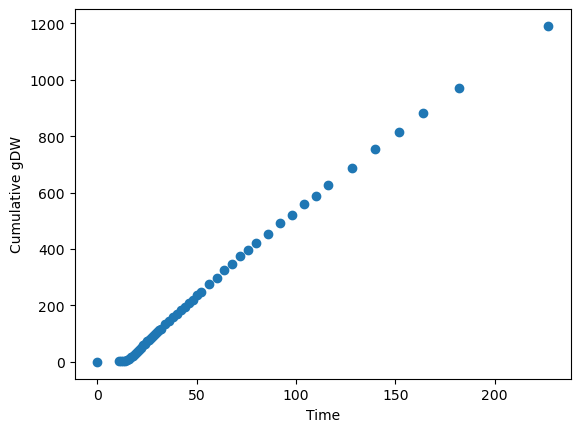

In [29]:
plt.scatter(df_OD.index[:-1], x)
plt.xlabel('Time')
plt.ylabel('Cumulative gDW')

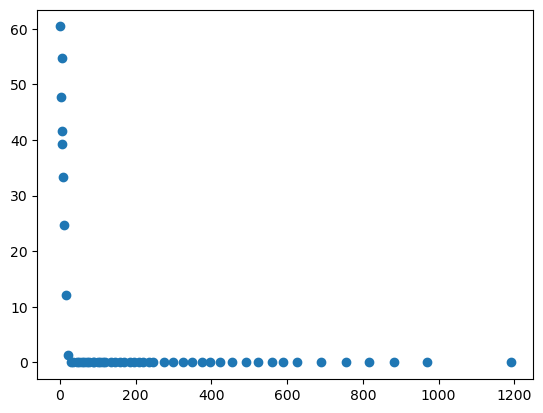

In [25]:
plt.scatter(x, df_glucose['Glucose mM'].values[:-1])

In [27]:
np.polyfit(x[:9], df_glucose['Glucose mM'][:9], 1)

array([-2.7168317 , 56.67020216])

## Mapping

In [70]:
mapping_df = pd.read_csv('../../data/id_mapping.csv', index_col=0)
# mapping_df.index = [x.strip('\t').replace(" MS", "") for x in mapping_df.index]
met_abrv_to_id = mapping_df['Cglutamicum metabolite'].to_dict()
met_abrv_to_name = mapping_df['Metabolite name'].to_dict()


# Estimate rates

In [118]:
timepoints[:9]

Index([0, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='Time')

In [37]:
concentrations

,G6P,F6P,FBP,DHAP,GA3P,23PG,R5P,RU5P+X5P,S7P,E4P,...,GLN,HOM,TYR,GLY,PRO,ALA,MET,VAL,ARG,LYS
Time,,,,,,,,,,,,,,,,,,,,,
0,0.173000,0.156000,0.000000,0.200000,0.339000,0.104000,0.173000,0.320000,0.183000,0.821000,...,0.232400,0.191333,0.000000,0.264000,0.255467,0.000000,0.000000,0.000000,0.073920,3.500000
11,0.280000,0.139000,0.676000,1.171000,0.044000,0.268000,0.059000,0.083000,0.057000,0.087000,...,0.051867,0.676933,0.000000,21.657333,0.764533,5.220000,0.000000,0.000000,NaN,236.100000
12,0.449000,0.302000,1.043000,1.566000,0.069000,0.558000,0.089000,0.104000,0.071000,0.036000,...,0.324933,1.264667,0.000000,55.202667,1.504533,6.480000,0.000000,0.000000,NaN,413.166667
13,0.868000,0.467000,1.419000,2.226000,0.070000,1.015000,0.126000,0.132000,0.100000,0.100000,...,0.458267,1.676667,0.000000,83.602667,2.397867,7.080000,0.000000,0.000000,NaN,628.500000
14,1.156000,0.583000,1.868000,2.972000,0.103000,1.152000,0.177000,0.186000,0.151000,0.249000,...,0.647600,2.202000,0.000000,93.736000,4.531200,7.746667,0.000000,0.000000,NaN,963.166667
15,1.831000,0.874000,2.087000,4.307000,0.155000,1.836000,0.242000,0.202000,0.207000,0.427000,...,1.331600,3.230000,0.000000,174.136000,8.704533,10.280000,0.000000,0.000000,NaN,1459.166667
16,2.484000,1.095000,2.369000,5.747000,0.241000,3.292000,0.382000,0.246000,0.264000,0.799000,...,3.355600,4.528667,0.000000,227.069333,15.744533,14.613333,0.000000,0.000000,NaN,2188.500000
17,2.880000,1.447000,2.593000,7.880000,0.369000,4.696000,0.538000,0.340000,0.381000,1.328000,...,10.487600,6.862000,0.000000,325.469333,34.691200,22.653333,0.000000,0.000000,NaN,3152.500000
18,3.559000,1.600000,2.701000,8.654000,0.457000,6.856000,0.583000,0.360000,0.425000,2.472000,...,0.287600,5.048667,0.000000,329.469333,7.024533,8.826667,0.000000,0.000000,NaN,4063.166667


In [65]:
specific_limits = {
'G6P': (1,18),
'F6P': (1,18),
'FBP': (1,18),
'DHAP': (1,18),
'GA3P': (1,18),
'23PG': (1,18),
'R5P': (1,18),
'RU5P+X5P': (1,18),
'S7P': (1,18),
'E4P': (1,18),
'ASN': (1,18),
'GLU': (1,17),
'SER': (1,17),
'THR': (1,17),
'GLN': (1,17),
'HOM': (1,17),
'TYR': (1,17),
'GLY': (1,18),
'PRO': (1,17),
'ALA': (1,17),
'MET': (1,17),
'VAL': (1,17),
'ARG': (1,17),
'LYS': (1,18)}

R-squared: 0.896696
R-squared: 0.897246
R-squared: 0.700649
R-squared: 0.932478
R-squared: 0.954825
R-squared: 0.945705
R-squared: 0.931412
R-squared: 0.899000
R-squared: 0.939357
R-squared: 0.917412
R-squared: 0.938956
R-squared: 0.891316
SER One or zero non-zero values in expo. phase
THR More than 1 zero
R-squared: 0.728655
R-squared: 0.872903
R-squared: 0.907280
TYR One or zero non-zero values in expo. phase
R-squared: 0.907255
R-squared: 0.928075
R-squared: 0.920594
MET One or zero non-zero values in expo. phase
VAL One or zero non-zero values in expo. phase
ARG One or zero non-zero values in expo. phase
R-squared: 0.951951


/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_32276/738746257.py:69: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, y_max)


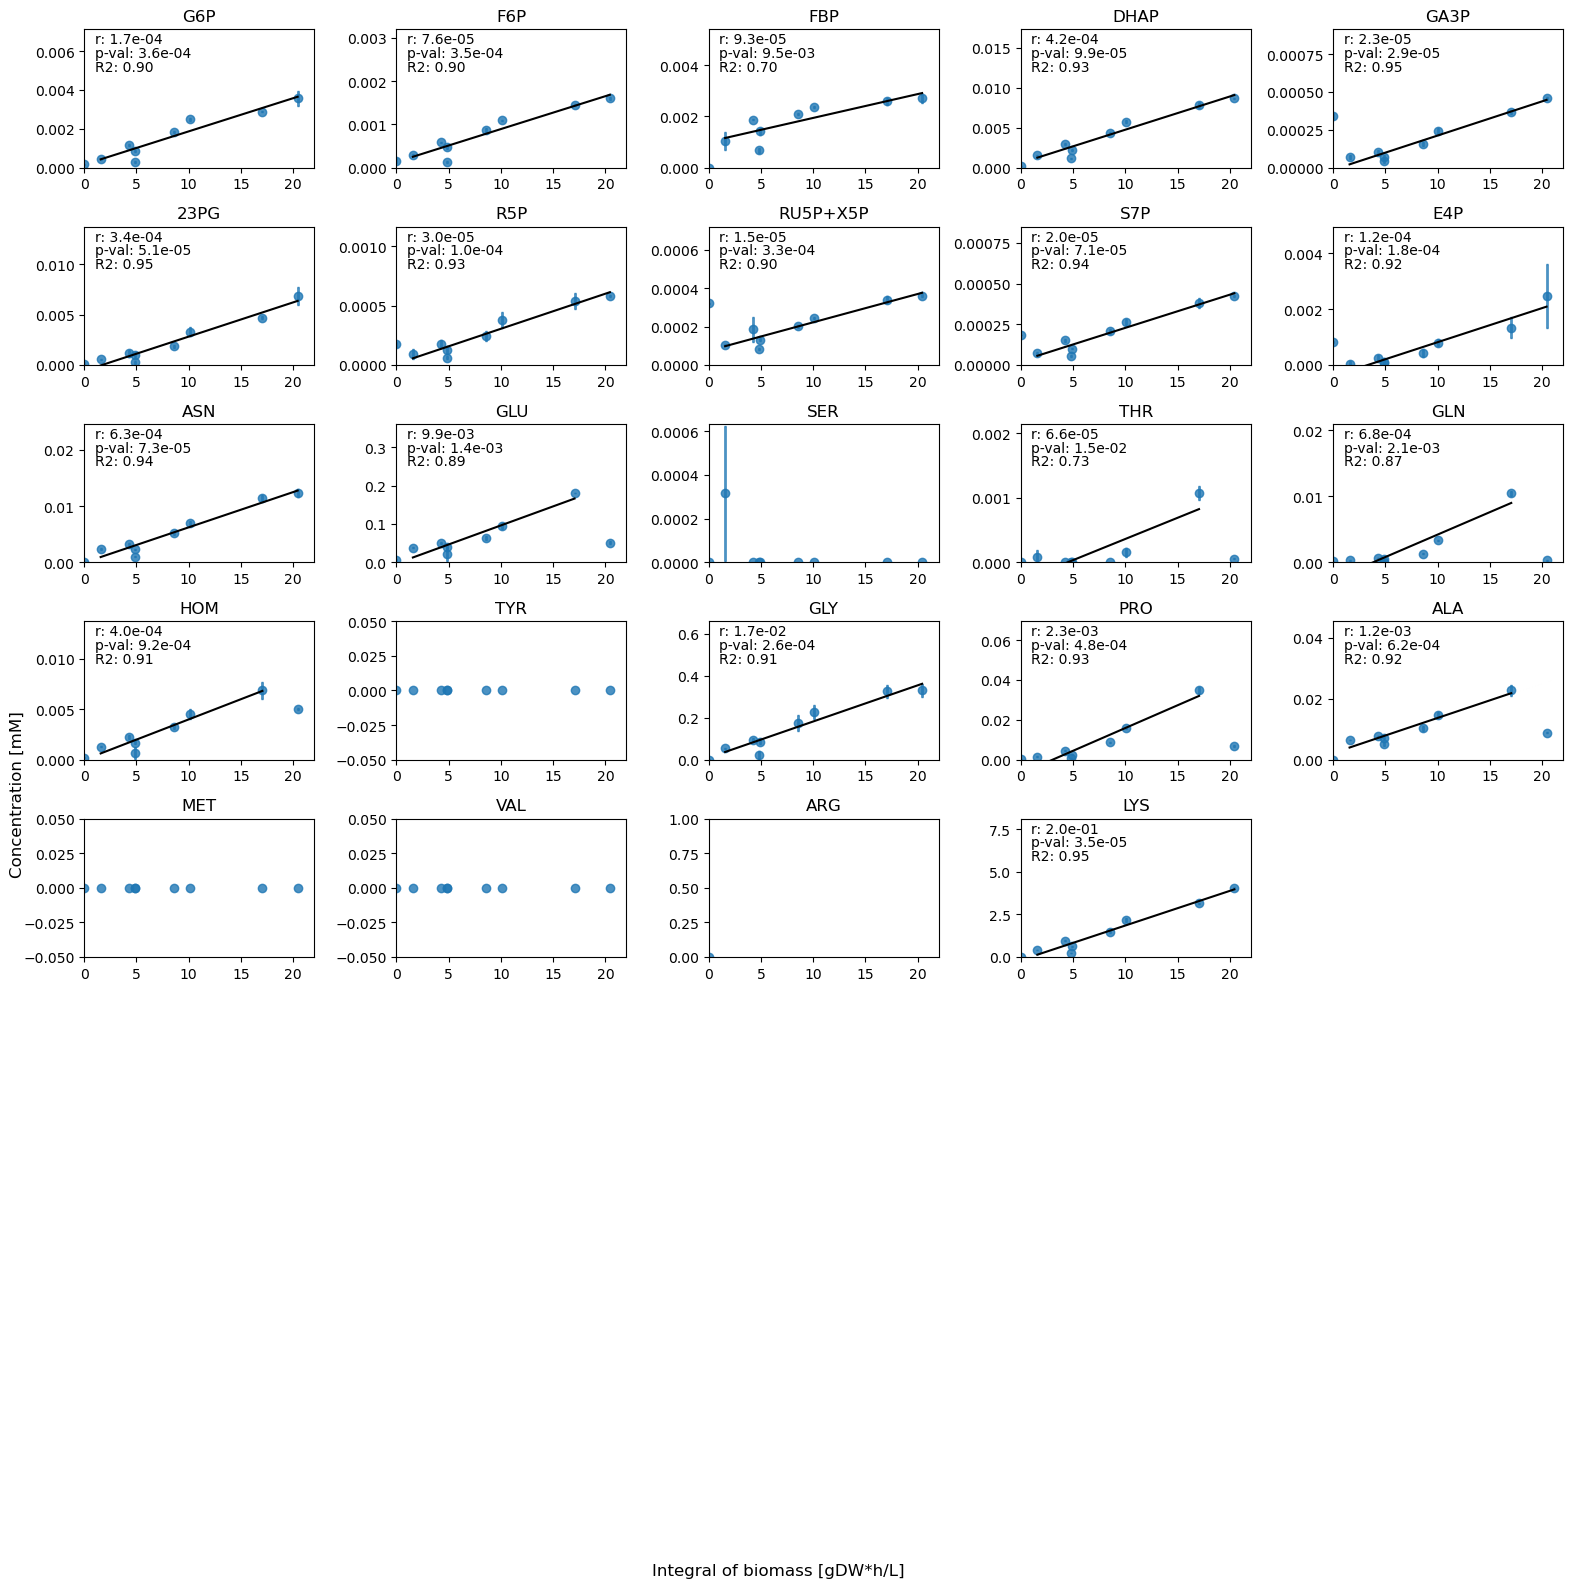

In [66]:
rate_dict_m = {}
fig, axes = plt.subplots(8,5, figsize = (16, 16), sharex = False)
axes = axes.flatten()
fun = lambda x, a ,b: x*a+b
data_list = []
for i,c in enumerate(concentrations.columns):
    # print(c)
    plot_fit = True
    conc = concentrations[c][:-1]*1e-3 # Convert from uM to mM #
    conc_std = concentrations_std[c][:-1]*1e-3
    lim = specific_limits[c]
    idx = ((concentrations.index >= lim[0]) & (concentrations.index <= lim[1]))[:-1]
    nan_idx = ~np.isnan(conc)

    idx = idx & nan_idx
    rate_conc = conc[idx]
    if np.sum(rate_conc == 0) > 1:
        if (np.sum(rate_conc == 0) >= len(rate_conc)-1):
            print(c, 'One or zero non-zero values in expo. phase')
            plot_fit = False
        else:
            print(c, 'More than 1 zero')
    elif (np.sum(idx.values)<=1):
        print(c, 'One or zero non-zero values in expo. phase')
        plot_fit = False
        
    # conc[conc==0] = np.nan
    # fit, cov, _,_,_ = scipy.optimize.curve_fit(fun, x[idx],
    #                                            conc[idx], full_output=True)

    # rate = fit[0]
    # std_err = np.sqrt(np.diag(cov))[0]
    # t_score = fit[0]/std_err
    # n_df = np.sum(idx)-2
 
    # p_val = scipy.stats.t.sf(t_score, df = n_df)*2 # *2 is to get two-sided
    if plot_fit:
        res = scipy.stats.linregress(x[idx], conc[idx])
        print(f"R-squared: {res.rvalue**2:.6f}")
        r2 = res.rvalue**2
        data = [res.slope, res.stderr,res.pvalue, c, res.pvalue < 0.05, r2]
        data_list.append(data)
        x_fit = np.linspace(x[idx].min(), x[idx].max(), 3)
        y_fit = fun(x_fit, res.slope, res.intercept)
    # rate_dict_m[c] = fit[0]
    # print(fit)
    
    ax = axes[i]
    ax.errorbar(x, conc, yerr = conc_std, fmt='o',color='C0',capthick=1,elinewidth=2,capsize=1, zorder = 0, alpha= 0.8)

    # ax.scatter(x, conc)
    # ax.scatter(x, conc)
    if len(conc[idx]):
        y_max =  np.nanmax(conc[idx])*2#[idx])
    else:
        y_max = 1
    if plot_fit:
        if r2 > 0.5:
            ax.plot(x_fit, y_fit, 'k')
        else:
            ax.plot(x_fit, y_fit, 'r')
            
        ax.annotate(f'r: {res.slope:.1e}', (1, y_max*0.9))
        ax.annotate(f'p-val: {res.pvalue:.1e}', (1, y_max*0.8))
        ax.annotate(f'R2: {r2:.2f}', (1, y_max*0.7))
        
    ax.set_title(c)
    ax.set_xlim(0, 22)
    ax.set_ylim(0, y_max)

    i +=1
    # print(i)

while i<(8*5):
    axes[i].set_visible(False)
    i+=1

fig.supxlabel('Integral of biomass [gDW*h/L]')
fig.supylabel('Concentration [mM]')

plt.tight_layout()
plt.savefig('cglutamicum_fitted_rates_manual_limits.png', dpi = 400)
plt.show()

In [76]:
rate_data = pd.DataFrame(data_list, columns = ['Rate [mmol/gDW/h]', 'Std.Err [mmol/gDW/h]', 'p-val', 'Metabolite abbrv.', 'Significance', 'R2'])

/Users/ssulheim/anaconda3/envs/pandas2/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


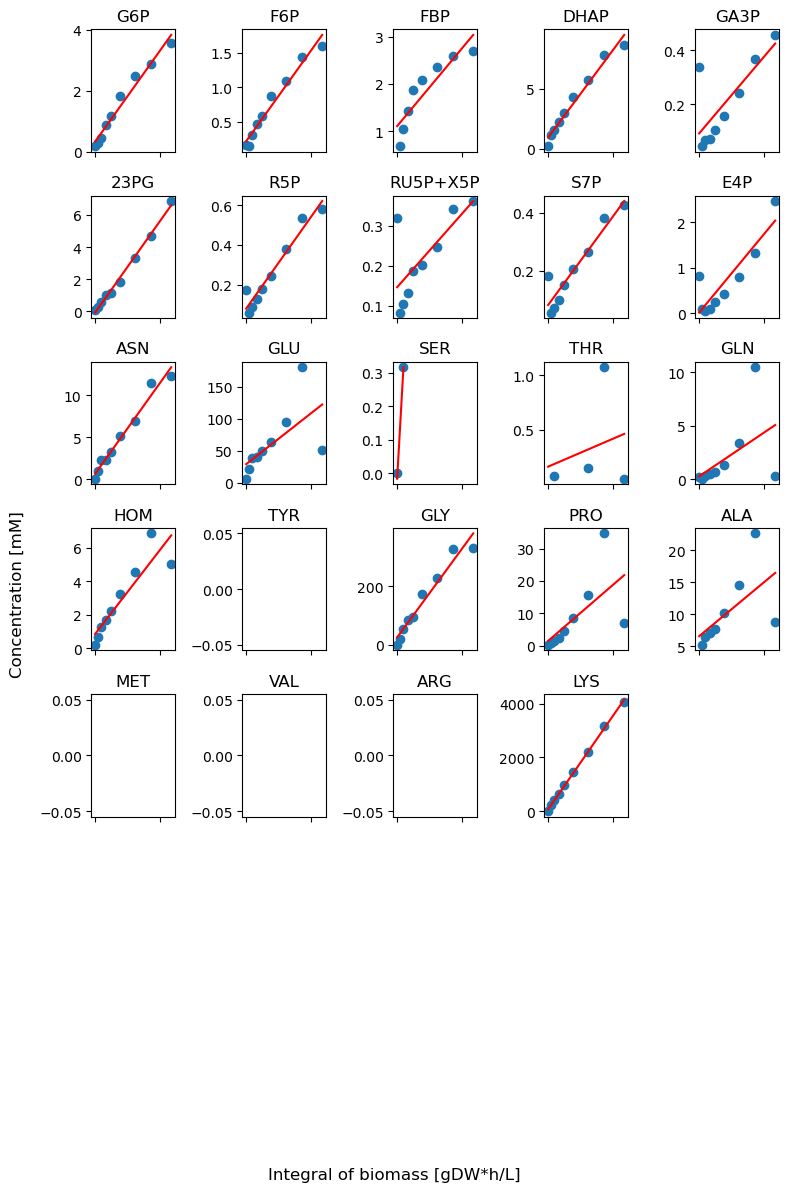

In [120]:
# rate_dict = {}
# fig, axes = plt.subplots(7,5, figsize = (8, 12), sharex = True)
# axes = axes.flatten()
# fun = lambda x, a ,b: x*a+b
# for i,c in enumerate(concentrations.columns):
#     conc = concentrations[c]
#     conc[conc==0] = np.nan
#     nan_idx = ~np.isnan(conc)
#     time_idx = x.index < 19
#     if np.sum(nan_idx&time_idx) == 1:
#         conc[0] = 0
#         nan_idx[0] = True
        
#     # print(conc[nan_idx&time_idx])
#     rate_conc = conc[nan_idx&time_idx]
#     selection = np.ones(len(conc)).astype(bool)
#     # if (7 in rate_conc.index) and (8 in rate_conc.index):
#     #     if rate_conc[8] < rate_conc[7]:
#     #         selection[8] = False
#     #         if rate_conc[6] < rate_conc[7]:
#     #             selection[7] = False
#     # print(c)
#     # print(conc[nan_idx&time_idx])
#     if len(conc[nan_idx&time_idx&selection]) >1:
#         fit, cov, _,_,_ = scipy.optimize.curve_fit(fun, x[nan_idx&time_idx&selection],
#                                                    conc[nan_idx&time_idx&selection],
#                                                    full_output=True)
#         rate_dict[c] = fit[0]
#     else:
#         rate_dict[c] = np.nan

#     # print(fit)
#     x_fit = np.linspace(0, x[nan_idx&time_idx].max(), 3)
#     y_fit = fun(x_fit, *fit)
#     ax = axes[i]
#     # ax.scatter(x, conc)
#     ax.scatter(x[nan_idx&time_idx], conc[nan_idx&time_idx])
#     ax.plot(x_fit, y_fit, 'r')
#     ax.set_title(c, )

# i +=1
# # print(i)
# while i<(7*5):
#     axes[i].set_visible(False)
#     i+=1

# fig.supxlabel('Integral of biomass [gDW*h/L]')
# fig.supylabel('Concentration [mM]')

# plt.tight_layout()
# plt.show()


# Get model

In [67]:
model_ez = reframed.load_cbmodel('../../models/c_glutamicum/smoment_iCW773.xml')
model_ez.solver = 'gurobi'

In [68]:
solution = reframed.FBA(model_ez)
solution.show_values('EX')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-19
R_EX_ca2_e   -0.0146654
R_EX_co2_e    10.0349
R_EX_cobalt2_e -7.08926e-05
R_EX_cu2_e   -0.00199691
R_EX_fe2_e   -0.0409159
R_EX_glc_e   -4.67
R_EX_h_e      3.35021
R_EX_h2o_e    19.5406
R_EX_k_e     -0.549947
R_EX_mg2_e   -0.024442
R_EX_mn2_e   -0.00194803
R_EX_nh4_e   -3.75795
R_EX_ni2_e   -0.000909257
R_EX_o2_e    -8.78033
R_EX_pi_e    -0.215743
R_EX_so4_e   -0.0696158
R_EX_xan_e    0.0696769
R_EX_zn2_e   -0.000960563
R_EX_biomass  0.434189
R_EX_BIOTIN  -1.03175e-06
R_EX_cl      -0.0146654


In [71]:
measured_metabolites = []
for bigg_id in met_abrv_to_id.values():
    if not isinstance(bigg_id, str):
        continue
    m_ids = bigg_id.split(', ')
    for m_id in m_ids:
        if f'M_{m_id}_c' in model_ez.metabolites:
            measured_metabolites.append(f'M_{m_id}_c')

# Shadow prices

In [72]:
shadow_prices = leakage_reframed.estimate_shadow_prices(model_ez, constraints={'R_EX_glc_e': (-2.5,0)}, metabolites = measured_metabolites)

# Turnover

In [74]:
solution = reframed.pFBA(model_ez, constraints={'R_EX_glc_e': (-2.7,0)})
turnover = solution.get_metabolites_turnover(model_ez)

    

# Make spreadsheet

In [77]:
data = []
drop_mets = ['ru5p__L','xu5p__L'] # The L-forms is used in the pentose phosphate pathway, so we assume that it is primarily the D-forms
# 'Std.Err [mmol/gDW/h]', 'T-score', 'degrees of freedom', 'p-val', 'Metabolite abbrv.', 'Significance']
for _, row in rate_data.iterrows():
    if row['R2']<0.5:
        continue
    abbr = row['Metabolite abbrv.']
    rate = row['Rate [mmol/gDW/h]']
    bigg_ids = [x.strip() for x in met_abrv_to_id[abbr].split(',') if not x.strip() in drop_mets]
    if len(bigg_ids)>1:
        print(bigg_ids)
    rate_i = rate/len(bigg_ids)
    std_err_i = row['Std.Err [mmol/gDW/h]']/np.sqrt(len(bigg_ids))
    for bigg_id in bigg_ids:
        name =met_abrv_to_name[abbr]
        m_id = f'M_{bigg_id}_c'
        mv = -shadow_prices[m_id]
        m = model_ez.metabolites[m_id]
        element_dict = ng_utils.get_element_dict(m)
        Nc = element_dict['C']
        mass = ng_utils.get_mol_weight(m)
        
        data.append([abbr, bigg_id, name, mv, turnover[m_id], Nc, mass, rate_i, std_err_i, row['R2']])
df_rate = pd.DataFrame(data, columns = ['Metabolite abbrv.', 'BiGG ID', 'Metabolite', 
                                        'Metabolite value [gDW/mmol]', 'Turnover [mmol/gDW/h]', 'N carbons', 
                                        'Mol weight [g/mol]', 'Rate [mmol/gDW/h]', 'Std.Err [mmol/gDW/h]', 'R2'])

['2pg', '3pg']
['ru5p__D', 'xu5p__D']


In [78]:
# data = []
# for abbr, rate in rate_dict.items():
#     bigg_ids = [x.strip() for x in met_abrv_to_id[abbr].split(',')]
#     rate = rate/len(bigg_ids)
#     for bigg_id in bigg_ids:
#         name =met_abrv_to_name[abbr]
#         m_id = f'M_{bigg_id}_c'
#         mv = -shadow_prices[m_id]
#         m = model_ez.metabolites[m_id]
#         element_dict = ng_utils.get_element_dict(m)
#         Nc = element_dict['C']
#         mass = ng_utils.get_mol_weight(m)
        
#         data.append([bigg_id, name, rate, mv, turnover[m_id], Nc, mass])
# df_rate = pd.DataFrame(data, columns = ['BiGG ID', 'Metabolite', 'Rate [mmol/gDW/h]', 
#                                         'Metabolite value [gDW/mmol]', 'Turnover [mmol/gDW/h]', 'N carbons', 
#                                         'Mol weight [g/mol]'])

In [79]:
df_rate['Species'] = 'C. glutamicum'
df_rate['Carbon source'] = 'Glucose'
df_rate['Dataset'] = 'Paczia-13'

In [81]:
df_rate.to_csv('paczia_13_rates_cglutamicum_130524.csv')